In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#Loading the NPZ file
data = np.load('C:/Users/zerox/Desktop/ML20019229/Datasets/pneumoniamnist.npz')
#print(data.keys()) #Get keys of the dataset

#split data
X_train,X_val,X_test = data['train_images'],data['val_images'],data['test_images']
y_train,y_val,y_test = data['train_labels'].flatten(),data['val_labels'].flatten(),data['test_labels'].flatten()

In [3]:
# Generate Digital labels
digital_label = {0: 'Normal', 1: 'Pneumonia'}

# Define a vectorizing function
vectorized_label_converter = np.vectorize(lambda x: digital_label.get(x))

# Vectorizing the label arrays
y_train_label = vectorized_label_converter(y_train)
y_val_label = vectorized_label_converter(y_val)
y_test_label = vectorized_label_converter(y_test)

Randomly Picked Train Images:


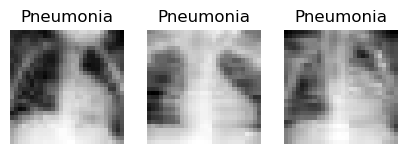

Randomly Picked Test Images:


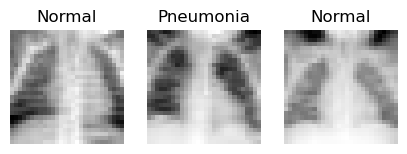

In [20]:
#Function to plot 6 randomly picked images with labels
def class_each_image(images,label,num=3):
    selection = np.random.choice(len(images),size=num,replace=False)
    #Create a 2*3 subplotted figure
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(5,2))
    axes = axes.flatten()
    
    #Display each image (6 images in total)
    for i, index in enumerate(selection):
        axes[i].imshow(images[index], cmap='grey')
        axes[i].set_title(f"{label[index]}")
        axes[i].axis('off')
    plt.show()

#print the label and image of train_image
print('Randomly Picked Train Images:')
class_each_image(X_train, y_train_label)
#print the label and imgge of test_image
print('Randomly Picked Test Images:')
class_each_image(X_test, y_test_label)
    

In [5]:
def resize_images(images, new_size=(128,128)):
    resized_images = []
    for idx in images:
        resized = cv2.resize(idx, new_size)
        resized_images.append(resized)
    return resized_images

In [6]:
def convert_to_rgb(images):
    converted_images = []
    for idx in images:
        if idx.shape[-1] == 3:
            converted_images.append(idx)
        else:
            converted_idx = np.stack([idx]*3, axis = -1)
            converted_images.append(converted_idx)
    return converted_images

In [7]:
def normalize_images(images):
    normalized_images = []
    for idx in images:
        idx = idx.astype('float32')
        idx /= 255.0
        normalized_images.append(idx)
    return normalized_images

In [8]:
X_train_preprocessed =  normalize_images(convert_to_rgb(resize_images(X_train,(128,128))))
X_val_preprocessed = normalize_images(convert_to_rgb(resize_images(X_val,(128,128))))
X_test_preprocessed = normalize_images(convert_to_rgb(resize_images(X_test,(128,128))))
#np.array(X_train_preprocessed).shape

In [9]:
# Assuming X_train_preprocessed, X_val_preprocessed, X_test_preprocessed are already defined
# Convert preprocessed data to numpy arrays (if they aren't already)
X_train_preprocessed = np.array(X_train_preprocessed)
X_val_preprocessed = np.array(X_val_preprocessed)
X_test_preprocessed = np.array(X_test_preprocessed)


# Ensure the labels are in the correct shape
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # Dropout layer added
    layers.Dense(2, activation='softmax')
])

In [11]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3,
    restore_best_weights=True
)

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(X_train_preprocessed, y_train, epochs=15, batch_size = 64, 
                    validation_data=(X_val_preprocessed, y_val),
                    callbacks=[early_stopping])

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test)

Epoch 1/30
74/74 [==============================] - 17s 228ms/step - loss: 0.4205 - accuracy: 0.8205 - val_loss: 0.1986 - val_accuracy: 0.9256
Epoch 2/30
74/74 [==============================] - 17s 224ms/step - loss: 0.2013 - accuracy: 0.9197 - val_loss: 0.1688 - val_accuracy: 0.9561
Epoch 3/30
74/74 [==============================] - 18s 238ms/step - loss: 0.1759 - accuracy: 0.9352 - val_loss: 0.1402 - val_accuracy: 0.9542
Epoch 4/30
74/74 [==============================] - 17s 235ms/step - loss: 0.1546 - accuracy: 0.9405 - val_loss: 0.1554 - val_accuracy: 0.9542
Epoch 5/30
74/74 [==============================] - 17s 226ms/step - loss: 0.1402 - accuracy: 0.9475 - val_loss: 0.1451 - val_accuracy: 0.9580
Epoch 6/30
20/20 [==============================] - 1s 56ms/step - loss: 0.6013 - accuracy: 0.8205


Training Accuracy: 0.9536958336830139
Validation Accuracy: 0.8835877776145935
Test Accuracy: 0.8205128312110901
Hyperparameters:
Number of Epochs: 10
Optimizer: Adam
Loss Function: Categorical Crossentropy


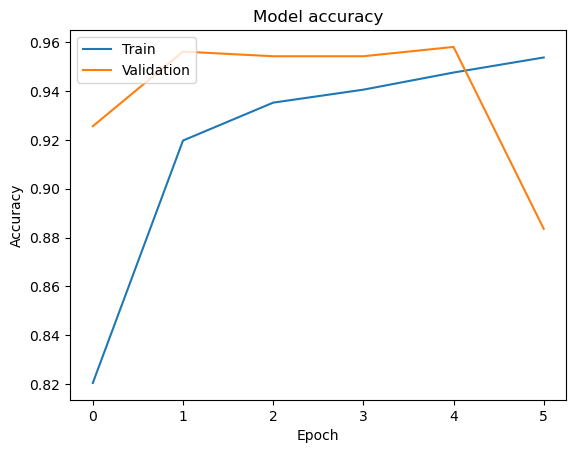

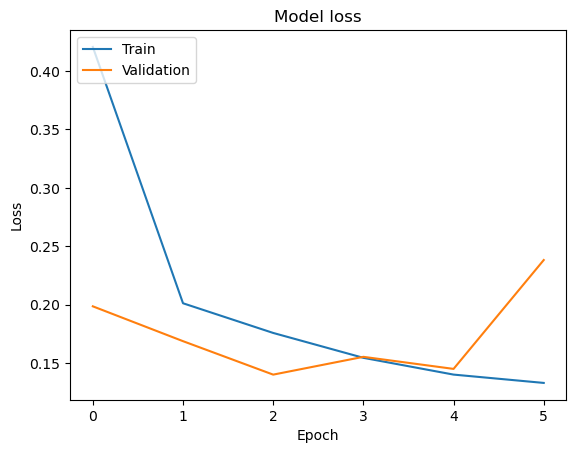

In [13]:
# Report training, validation and testing accuracy
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Test Accuracy: {test_accuracy}")

# Report hyperparameters
print("Hyperparameters:")
print(f"Number of Epochs: 10")
print(f"Optimizer: Adam")
print(f"Loss Function: Categorical Crossentropy")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
model.save('PneumoniaMNIST.h5')